In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# sklearn의 iris 데이터를 이용해 분류를 하는 과제입니다.
아래 코드는 iris 데이터를 분류해 iris_dataset에 저장하는 코드이므로 그대로 돌려주시면 됩니다.

In [2]:
import pandas as pd # 데이터 프레임으로 변환을 위해 임포트
import numpy as np # 고수학 연산을 위해 임포트

from sklearn.datasets import load_iris
iris_dataset = load_iris()

### iris_dataset의 keys를 확인하시오. 

In [3]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

### train_test_split를 사용하여 지난 과제와 동일한 기준으로 train 셋과 test 셋을 분리해보겠습니다.
- testset 의 size : 전체 데이터 셋의 25%

- 각 set의 이름 : X_train, X_test, y_train, y_test로 한다.

- 힌트: X는 iris_dataset["data"], y는 iris_dataset["target"]

- random_state = 42

In [4]:
data = iris_dataset['data']
target = iris_dataset['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data, target, test_size=0.25, random_state=42)

### X_train의 크기와 y_train의 크기를 확인하시오.

In [5]:
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


### sklearn의 KNeighborsClassifier 모델을 만들고, 트레인 데이터 셋을 fit 시키시오.
- n_neihbors=1
- 트레인 데이터 셋 : X_train, y_train

In [6]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier(n_neighbors=1)

In [7]:
kn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### X_new를 예측하시오
- X_new = np.array([[5, 2.9, 1, 0.2]]) 

In [8]:
X_new = np.array([[5, 2.9, 1, 0.2]])

In [9]:
kn_clf.predict(X_new)

array([0])

### sklearn의 SVC 모델을 만들고, 트레인 데이터 셋을 fit 시키시오.
- gamma="auto", random_state=42
- 트레인 데이터 셋 : X_train, y_train

In [10]:
from sklearn.svm import SVC
 
svc= SVC(random_state=42, gamma='auto')
 
svc.fit(X_train, y_train)

SVC(gamma='auto', random_state=42)

### X_new를 예측하시오
- X_new = np.array([[5, 2.9, 1, 0.2]]) 

In [11]:
X_new = np.array([[5, 2.9, 1, 0.2]])
svc.predict(X_new)

array([0])

### decision_function()을 호출해 각 클래스의 점수 확인하고 위와 일치하는지 보기.

In [12]:
y_score = svc.decision_function(X_new)
y_score

array([[ 2.23354508,  0.81977305, -0.1792457 ]])

### np.armax()를 통해 최댓값의 인덱스 확인하기.

In [13]:
np.argmax(y_score)

0

### SVC 기반으로 OvR 전략 사용하는 다중 분류 모델을 만들고, 트레인 데이터 셋을 fit 시키시오.
- from sklearn.multiclass import OneVsRestClassifier
- 옵션: SVC(gamma="auto", random_state=42)
- 트레인 데이터 셋 : X_train, y_train

In [14]:
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(gamma='auto', random_state=42))

### X_new를 예측하시오
- X_new = np.array([[5, 2.9, 1, 0.2]]) 

In [15]:
ovr.predict(X_new)

array([0])

### 아래는 랜덤 포레스트 분류기 생성 코드입니다. 그냥 돌려주세요!

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf =RandomForestClassifier(random_state=1)


### cross_val_score로 rf 모델의 score list를 생성하고 프린트 하시오.
- cv=5 설정
- 트레인 데이터 셋 : X_train, y_train

In [17]:
from sklearn.model_selection import cross_val_score
scores =cross_val_score(rf,X_train,y_train, cv=5,scoring="accuracy")

In [18]:
print(scores)

[0.95652174 0.95652174 0.81818182 1.         0.95454545]


### corss_val_predict 함수로 예측을 하시오.
- from sklearn.model_selection import cross_val_predict

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(rf,X_train,y_train,cv=5) 
y_train_pred

array([0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0,
       1, 2])

### y_train과 y_train_pred의 confusion_matrix를 출력하시오.

In [20]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_train,y_train_pred)
conf_matrix

array([[35,  0,  0],
       [ 0, 35,  4],
       [ 0,  3, 35]], dtype=int64)

### y_train과 y_train_pred의 정밀도와 재현율을 출력하시오. 
- 각각 average='micro'설정

In [21]:
from sklearn.metrics import precision_score, recall_score

#정밀도
print(precision_score(y_train, y_train_pred,average='micro'))

0.9375


In [22]:
#재현율
print(recall_score(y_train, y_train_pred,average='micro'))

0.9375


# titanic.csv를 이용한 분류도 진행해 보겠습니다. 

In [23]:
# 타이타닉 파일 읽어오기
titanic=pd.read_csv('titanic.csv')

### train 데이터의 head()를 살펴보시오.

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 필요없는 변수를 제거하시오. ("PassengerID", "Name", "Ticket","Cabin")

In [25]:
titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

### Nan 값이 있는 행을 삭제하시오.

In [26]:
titanic.dropna(axis=0,inplace=True)

### 명목변수에 대한 encoding을 하시오. 

In [27]:
def dummy_df(df):
    for x in ['Pclass','Sex','Embarked']:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

titanic = dummy_df(titanic)
titanic.drop(['Sex_female'],axis=1,inplace=True)
titanic.head(3)

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,0,1


### 타이타닉 데이터의 종속변수를 분리해, X_titanic과 y_titanic으로 저장하시오

In [28]:
X_titanic = titanic.drop('Survived', axis = 1)
y_titanic = titanic['Survived']

### train_test_split를 사용하여 지난 과제와 동일한 기준으로 train 셋과 test 셋을 분리해보겠습니다. 
- testset 의 size : 전체 데이터 셋의 25%

- 각 set의 이름 : X_train, X_test, y_train, y_test로 한다.
- random_state = 42

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic, y_titanic, test_size=0.25, random_state=42)

### StandardSclaer를 사용해서 데이터의 정규화 하시오.
- 정규화 대상 : X_train, X_test

- X_train은 fit_transform()을 X_test는 transform() 을 사용하시오.

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### sklearn.linear_model의 LogisticRegression으로 모델 생성하시오.

In [31]:
from sklearn.linear_model import LogisticRegression
lg_reg= LogisticRegression()

train세트 (X_train, y_train)의 정확도 구하기

In [32]:
lg_reg.fit(X_train, y_train)
print(lg_reg.score(X_train, y_train))

0.8052434456928839


### test세트 (X_test, y_test)의 정확도를 구하시오.

In [33]:
print(lg_reg.score(X_test, y_test))

0.7752808988764045


###  cross_val_predict 로 y 예측값을 구한후, 오차 행렬 생성하시오.
- cv=3

In [38]:
y_train_pred=cross_val_predict(lg_reg,X_train,y_train,cv=3) 
conf_matrix=confusion_matrix(y_train,y_train_pred)
conf_matrix

array([[273,  52],
       [ 58, 151]], dtype=int64)

### ROC 곡선을 그리시오.

그림 저장: roc_curve_plot


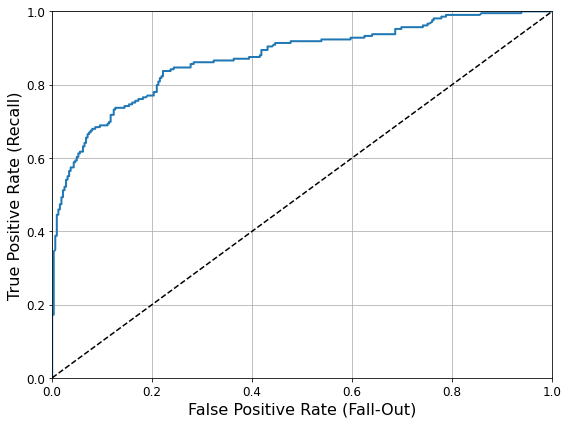

In [61]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train,lg_reg.decision_function(X_train))

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 대각 점선
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)

save_fig("roc_curve_plot")                                    # Not shown
plt.show()